In [1]:
import tensorflow as tf
import cv2 
import os
import matplotlib.pyplot as plt
import numpy as np

In [4]:
training_Data = []      # data
Datadirectory = "F:/SEM4/sem4_pbl"
Classes = ["mask","without_mask"]
img_size = 224

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory,category)
        class_num = Classes.index(category)    # 0 and 1 as label 
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array,(img_size,img_size))  #resizing for IMAGENET
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [5]:
create_training_Data()

In [6]:
import random
random.shuffle(training_Data)

In [7]:
X = []
y = []

for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1,img_size,img_size,3)

In [8]:
X = X/255.0

In [9]:
Y = np.array(y)   # saving label 0 and 1 in numpy array too

# STORING IN BETTER WAY IN PICKLE

In [8]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

# DEEP LEARNING MODEL FOR TRAINING - TRANSFER LEARNING

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
model = tf.keras.applications.mobilenet.MobileNet()   #pre trained model

In [13]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

# Transfer learning will start from last checkpoint

In [10]:
base_input = model.layers[0].input

In [11]:
base_output = model.layers[-4].output

In [12]:
Flay_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flay_layer)
final_ouput = layers.Activation('sigmoid')(final_output)

In [13]:
new_model = keras.Model(inputs = base_input,outputs = final_output)

In [18]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

   # SETTINGS FOR BINARY CLASSIFICATION (FACE MASK /WITHOUT FACE MASK )

In [19]:
new_model.compile(loss = "binary_crossentropy" , optimizer = "adam" ,metrics = ["accuracy"])

In [22]:
new_model.fit(X,Y, epochs = 1,validation_split = 0.1)

53/53 [==============================] - 425s 8s/step - loss: 0.8600 - accuracy: 0.9402 - val_loss: 0.9074 - val_accuracy: 0.9362


In [23]:
# saving model
new_model.save('my_model1.h5')

In [2]:
new_model = tf.keras.models.load_model('my_model1.h5')

# CHECKING FOR NETWORK PREDICTIONS

In [10]:
img_array = cv2.imread("F:/sem4_pbl/mask/00000_Mask.jpg")

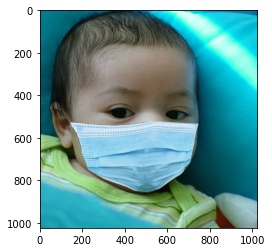

In [11]:
plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))

In [12]:
final_image = cv2.resize(img_array,(224,224))
final_image = np.expand_dims(final_image,axis = 0)   # fourth dimension
final_image = final_image/255.0

In [13]:
Predictions = new_model.predict(final_image)

In [14]:
Predictions

array([[-32.868576]], dtype=float32)

In [52]:
#unknown image
frame = cv2.imread('F:/sem4_pbl/without_mask/00000_Mask_Mouth_Chin.jpg')

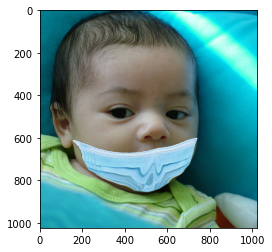

In [53]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [54]:
final_image = cv2.resize(frame,(224,224))
final_image = np.expand_dims(final_image,axis = 0)   # fourth dimension
final_image = final_image/255.0

In [55]:
Predictions = new_model.predict(final_image)

In [56]:
Predictions

array([[12.120021]], dtype=float32)

# CROPING FACE OUT 

In [57]:
frame = cv2.imread('C:/Users/omkar/OneDrive/Desktop/download.jpg')

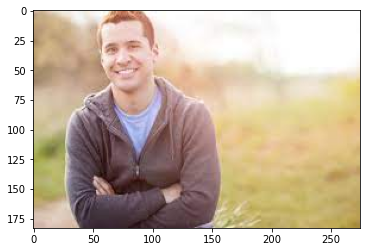

In [58]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [60]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [61]:
gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [63]:
gray.shape

(183, 275)

In [66]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = frame[y:y+h,x:x+w]
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey:ey+eh,ex:ex+ew]
            

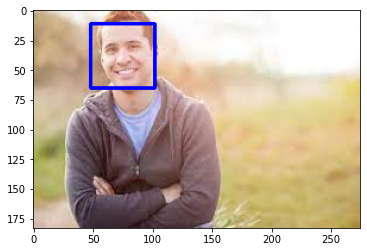

In [67]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

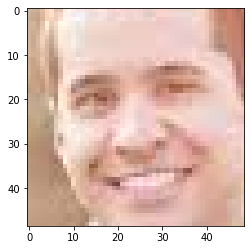

In [68]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [69]:
final_image = cv2.resize(frame,(224,224))
final_image = np.expand_dims(final_image,axis = 0)   # fourth dimension
final_image = final_image/255.0

In [70]:
Predictions = new_model.predict(final_image)

In [71]:
Predictions

array([[2.1699758]], dtype=float32)

# VIDEO DEMO 1

In [3]:
import cv2
import numpy as np

path = "haarcascade_frontalface_default.xml"
font_scale = 2.0
font = cv2.FONT_HERSHEY_SCRIPT_SIMPLEX

# set rectangle background to white
rectangle_bgr = (255,255,255)
# make a blavk image
img = np.zeros((500,500))
# set some text
text = "Some text in the box"
# get width n height of the text box
(text_width,text_height) = cv2.getTextSize(text,font,fontScale = font_scale,thickness = 1)[0]
#set text start position
text_offset_x = 10
text_offset_y = img.shape[0] - 25
# make coordinates of box with a small padding of 2 pixels
box_coords = ((text_offset_x,text_offset_y) , (text_offset_x + text_width + 2 ,text_offset_y - text_height - 2 ))
cv2.rectangle(img,box_coords[0],box_coords[1],rectangle_bgr,cv2.FILLED)
cv2.putText(img,text,(text_offset_x,text_offset_y),font,fontScale = font_scale,color=(0,0,0),thickness = 1)

#starting webcam
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot Open Webcam")

while True:
    ret,frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = frame[y:y+h,x:x+w]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not detected")
        else:
            for (ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey:ey+eh,ex:ex+ew]
    final_image = cv2.resize(frame,(224,224))
    final_image = np.expand_dims(final_image,axis = 0)   # fourth dimension
    final_image = final_image/255.0
    font = cv2.FONT_HERSHEY_SIMPLEX
    Predictions = new_model.predict(final_image)
    
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN

    if(Predictions>0):     #NO Mask
        status = "NO FACE MASK :( "
        
        x1,y1,w1,h1 = 0,0,175,175
        #draw black background rect
        cv2.rectangle(frame,(x1,y1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    
    else:
        status = "FACE MASK ON :) "
        
        x1,y1,w1,h1 = 0,0,175,175
        #draw black background rect
        cv2.rectangle(frame,(x1,y1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0),2)
        cv2.putText(frame,status,(100,150),font,3,(0,255,0),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0))
        
    cv2.imshow("FACE MASK DETECTION",frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

            

# ADDING BEEP SOUND

In [2]:
import winsound
frequency = 2500
duration = 1000

import cv2
import numpy as np

path = "haarcascade_frontalface_default.xml"
font_scale = 2.0
font = cv2.FONT_HERSHEY_SCRIPT_SIMPLEX

# set rectangle background to white
rectangle_bgr = (255,255,255)
# make a blavk image
img = np.zeros((500,500))
# set some text
text = "Some text in the box"
# get width n height of the text box
(text_width,text_height) = cv2.getTextSize(text,font,fontScale = font_scale,thickness = 1)[0]
#set text start position
text_offset_x = 10
text_offset_y = img.shape[0] - 25
# make coordinates of box with a small padding of 2 pixels
box_coords = ((text_offset_x,text_offset_y) , (text_offset_x + text_width + 2 ,text_offset_y - text_height - 2 ))
cv2.rectangle(img,box_coords[0],box_coords[1],rectangle_bgr,cv2.FILLED)
cv2.putText(img,text,(text_offset_x,text_offset_y),font,fontScale = font_scale,color=(0,0,0),thickness = 1)

#starting webcam
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot Open Webcam")

while True:
    ret,frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = frame[y:y+h,x:x+w]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not detected")
        else:
            for (ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey:ey+eh,ex:ex+ew]
    final_image = cv2.resize(frame,(224,224))
    final_image = np.expand_dims(final_image,axis = 0)   # fourth dimension
    final_image = final_image/255.0
    font = cv2.FONT_HERSHEY_SIMPLEX
    Predictions = new_model.predict(final_image)
    
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN

    if(Predictions>0):     #NO Mask
        status = "NO FACE MASK :( "
        
        x1,y1,w1,h1 = 0,0,175,175
        #draw black background rect
        cv2.rectangle(frame,(x1,y1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
        
        winsound.Beep(frequency,duration)
    
    else:
        status = "FACE MASK ON :) "
        
        x1,y1,w1,h1 = 0,0,175,175
        #draw black background rect
        cv2.rectangle(frame,(x1,y1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0),2)
        cv2.putText(frame,status,(100,150),font,3,(0,255,0),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0))
        
    cv2.imshow("FACE MASK DETECTION",frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

            

NameError: name 'new_model' is not defined